# Autoencoder

In [318]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import metrics

In [376]:
input_dim = z_pca_df.shape[1]
encoding_dim = 5
hidden_dim = 1
learning_rate = 1e-7
nb_epoch = 50
batch_size = 1024

In [377]:
# one layer and 5 nodes
input_layer = Input(shape = (input_dim,))
encoder = Dense(encoding_dim, activation = 'tanh',
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
# encoder = Dense(hidden_dim, activation = 'relu')(encoder)
# decoder = Dense(hidden_dim,activation = 'tanh')(encoder)
decoder = Dense(input_dim,activation = 'relu')(encoder)
autoencoder = Model(inputs = input_layer, outputs = decoder)

In [378]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 48        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [379]:
autoencoder.compile(metrics = ['accuracy'],
                   loss = 'mean_squared_error',
                   optimizer = 'adam')
# cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                save_best_only=True,
#                                verbose=0)

# tb = TensorBoard(log_dir='./logs',
#                 histogram_freq=0,
#                 write_graph=True,
#                 write_images=True)

autoencoder.fit(z_pca_df, z_pca_df,
                     epochs=nb_epoch,
                          batch_size=batch_size,
                   shuffle=True,
                    verbose=1)

Epoch 1/50
1070994/1070994 [==============================] - 2s 2us/step - loss: 0.9954 - accuracy: 0.5689
Epoch 2/50
1070994/1070994 [==============================] - 2s 2us/step - loss: 0.9895 - accuracy: 0.6571
Epoch 3/50
1070994/1070994 [==============================] - 2s 2us/step - loss: 0.9864 - accuracy: 0.7248: 1s - loss: 0.7992 - accuracy:  - ETA: 0s - loss: 0.9781  - ETA: 0s - loss: 1.0071 - accuracy: 
Epoch 4/50
1070994/1070994 [==============================] - 2s 1us/step - loss: 0.9840 - accuracy: 0.8064
Epoch 5/50
1070994/1070994 [==============================] - 2s 1us/step - loss: 0.9821 - accuracy: 0.7921
Epoch 6/50
1070994/1070994 [==============================] - 2s 1us/step - loss: 0.9802 - accuracy: 0.7713
Epoch 7/50
1070994/1070994 [==============================] - 2s 2us/step - loss: 0.9783 - accuracy: 0.7863: 0s - los
Epoch 8/50
1070994/1070994 [==============================] - 2s 1us/step - loss: 0.9765 - accuracy: 0.6587
Epoch 9/50
1070994/1070994 [==

In [380]:
pred = autoencoder.predict(z_pca_df)
pred.shape

(1070994, 8)

In [381]:
pred_df = pd.DataFrame(pred)
pred_df.columns = ['predPCA1','predPCA2','predPCA3','predPCA4','predPCA5','predPCA6','predPCA7','predPCA8']
pred_df.head()

,predPCA1,predPCA2,predPCA3,predPCA4,predPCA5,predPCA6,predPCA7,predPCA8
0,0.000000,0.000000,0.000000,0.044164,0.028213,0.000000,0.029836,0.0
1,4.114280,9.010249,6.900694,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.112350,0.000000,0.024605,0.033500,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.044366,0.033749,0.000000,0.008829,0.0
4,7.741181,0.000000,0.000000,0.000000,0.000000,14.547975,0.000000,0.0


In [416]:
## Find the difference between original input records and output records
diff = pd.DataFrame()
for i in range(8):
    diff[i] = abs(z_pca_df.iloc[:,i] - pred_df.iloc[:,i])
diff.columns = ['diff1','diff2','diff3','diff4','diff5','diff6','diff7','diff8']
diff.head()

,diff1,diff2,diff3,diff4,diff5,diff6,diff7,diff8
0,0.032383,0.145470,0.125823,0.019353,0.235412,0.054391,0.024626,0.035798
1,1.645210,11.049312,4.075947,3.337183,2.569274,3.095655,2.356457,73.879346
2,0.018226,0.017840,0.090244,0.062956,0.017886,0.136472,0.029682,0.603829
3,0.042037,0.094059,0.126849,0.050481,0.109037,0.004066,0.057844,0.171531
4,1.118293,4.655318,2.919147,4.642028,22.393216,4.441082,6.807341,0.722238


In [424]:
m2 = diff**2
m2['sum'] = m2.sum(axis = 1)
m2['s2'] = m2['sum']**1/2
m2 = m2.sort_values('s2',ascending = False)

In [425]:
m2.head(10)

,diff1,diff2,diff3,diff4,diff5,diff6,diff7,diff8,sum,s2
632815,260226.159315,201110.027807,322078.159332,197879.901374,18095.494152,13774.339316,9357.417746,16.854663,1.022538e+06,511269.176852
565391,396100.440395,150612.141982,213507.921776,45240.532003,328.518481,36930.837033,5218.685461,3669.948085,8.516090e+05,425804.512608
1067359,16198.362081,346129.444002,262922.575213,28507.571015,86.941522,38084.297447,831.319605,138239.257649,8.309998e+05,415499.884267
917941,32606.998978,3872.989418,23752.835776,10130.173201,271538.727078,165479.576915,5421.483573,6806.216013,5.196090e+05,259804.500476
585117,21477.761310,12811.115563,1082.468574,187772.035689,99647.807426,20979.773893,24431.354389,2835.296667,3.710376e+05,185518.806755
67128,39801.266040,2169.931232,3060.099128,789.089239,134273.935087,0.030149,160836.432422,21849.954760,3.627807e+05,181390.369029
585438,16034.561118,9751.441290,5.701324,168130.439074,17200.704577,50580.221163,6910.965990,612.555723,2.692266e+05,134613.295129
565397,51597.910734,12892.555264,14581.901226,1253.677376,9196.218289,60198.600176,115834.061060,2778.763382,2.683337e+05,134166.843753
85885,21582.164803,9393.438948,2726.588657,7932.759587,140190.552743,17268.548522,765.642832,139.750064,1.999994e+05,99999.723078
585119,12139.748607,8155.183895,851.628601,126287.197277,22040.365356,3649.952051,15642.671961,187.183253,1.889539e+05,94476.965501


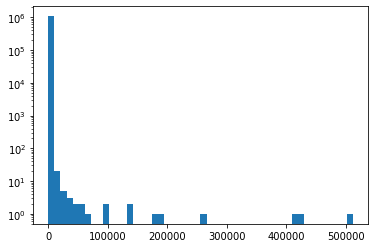

In [430]:
plt.hist(m2['s2'], bins = 50)
plt.yscale('log')
plt.show()